In [1]:
# Notebook Imports 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the Data from CSV to Pandas DataFrame

In [3]:
data = pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv")
data.columns=['age','year','nodes','status']
data.head()

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
data.tail()

,age,year,nodes,status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [5]:
data.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### Dataset Info
Age of patient at time of operation (numerical) <br>
Patient's year of operation (year - 1900, numerical)<br>
Number of positive axillary nodes detected (numerical)<br>
Survival status (class attribute)<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 year<br>

In [7]:
# count of how many people survive more than 5 year and how many survive less than who all are dignose with the cancer 
data.status.value_counts()

1    224
2     81
Name: status, dtype: int64

## Checking for null vlaues 

In [8]:
# total null values present in the dataset
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

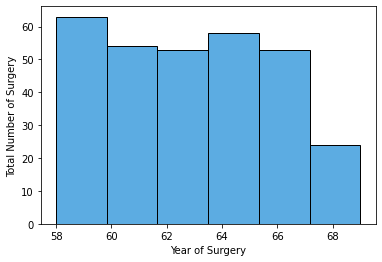

In [9]:
# plotting the histogram of year of surgery to find out which year has the maximum number of surgery 
sns.histplot(data= data , x='year',bins=6  , color="#2691d9")
plt.xlabel("Year of Surgery")
plt.ylabel("Total Number of Surgery")
plt.show()

**The Highest number of surgeries are conducted during 1958-1960 which can be  interpreted as over the time the health care system is improved and there are less number of cases for the cancer**

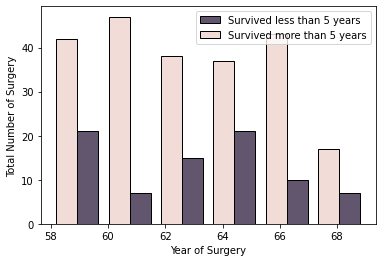

In [10]:
# plotting the histogram of year of surgery to find out which year has the maximum number of surgery 
sns.histplot(data= data , x='year',bins=6 , hue = 'status' , color=["#2691d9",'#9a0000'],
            multiple="dodge",shrink=.8 , legend=True
            )
plt.xlabel("Year of Surgery")
plt.ylabel("Total Number of Surgery")
plt.legend(['Survived less than 5 years','Survived more than 5 years'])
plt.show()

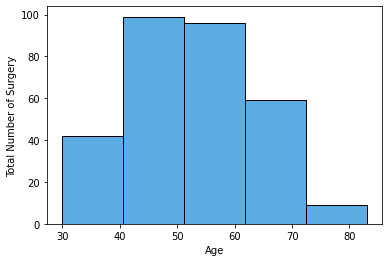

In [11]:
# plotting the histogram of age of the person dignosed with breast cancer 
sns.histplot(data= data , x='age',bins=5  , color="#2691d9")
plt.xlabel("Age")
plt.ylabel("Total Number of Surgery")
plt.show()

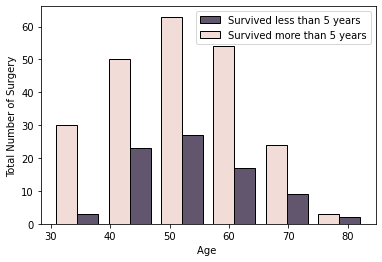

In [12]:
# plotting the histogram of age of the person dignosed with breast cancer 
sns.histplot(data= data , x='age',bins=6 , hue = 'status' , color=["#2691d9",'#9a0000'],
            multiple="dodge",shrink=.8 , legend=True , fill=True
            )
plt.xlabel("Age ")
plt.ylabel("Total Number of Surgery")
plt.legend(['Survived less than 5 years','Survived more than 5 years'])
plt.show()

**1. The Age group that had the maximum number of surgeries is 50 - 60 . From this we can conclude  that a mid aged person have more chances of having breast cancer than a adult or old age person. **<br>
**2.Person in the age group of 75-85 having breast cancer have 50-50 % chances that they will survive more than 5 years. This shows that old people have less survival rate when dignosed with cancer.**

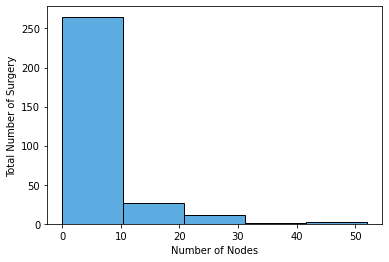

In [13]:
# plotting the histogram of number of nodes 
sns.histplot(data= data , x='nodes',bins=5  , color="#2691d9")
plt.xlabel("Number of Nodes")
plt.ylabel("Total Number of Surgery")
plt.show()

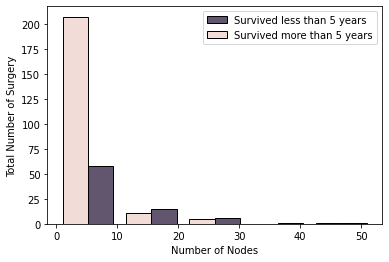

In [14]:
# plotting the histogram of number of nodes 
sns.histplot(data= data , x='nodes',bins=5 , hue = 'status' , color=["#2691d9",'#9a0000'],
            multiple="dodge",shrink=.8 , legend=True , fill=True
            )
plt.xlabel("Number of Nodes")
plt.ylabel("Total Number of Surgery")
plt.legend(['Survived less than 5 years','Survived more than 5 years'])
plt.show()

**1. The number of person dignosed with breast cancer have number of nodes in the range 1-10 are very high than the number of person having high number of nodes.**
<br>
**2. When a person have less number of nodes then thier chances of surviving more than 5 year are very high than the person having high number of nodes.**

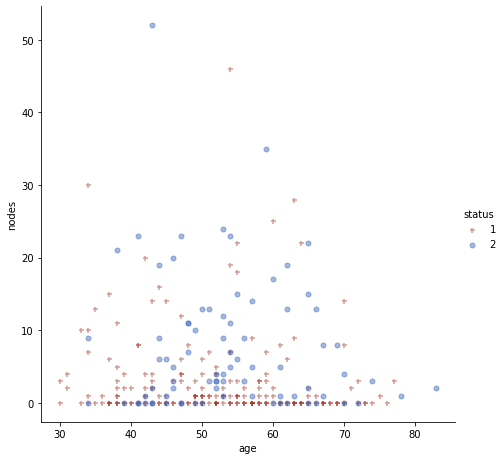

In [15]:
color_comb = ["#AB3A2C","#4A71C0"]
sns.lmplot(data = data , x = 'age' , y = 'nodes' , hue='status' , fit_reg=False ,  legend=True ,
          height = 6.5 , scatter_kws={"alpha":0.5 , 's':25} ,palette=color_comb,markers=["+","o"])


plt.show()

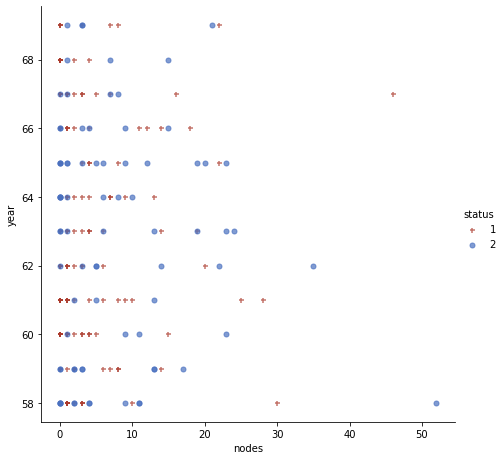

In [16]:
color_comb = ["#AB3A2C","#4A71C0"]
sns.lmplot(data = data , x = 'nodes' , y = 'year' , hue='status' , fit_reg=False ,  legend=True ,
          height = 6.5 , scatter_kws={"alpha":0.7 , 's':25} ,palette=color_comb,markers=["+","o"])


plt.show()

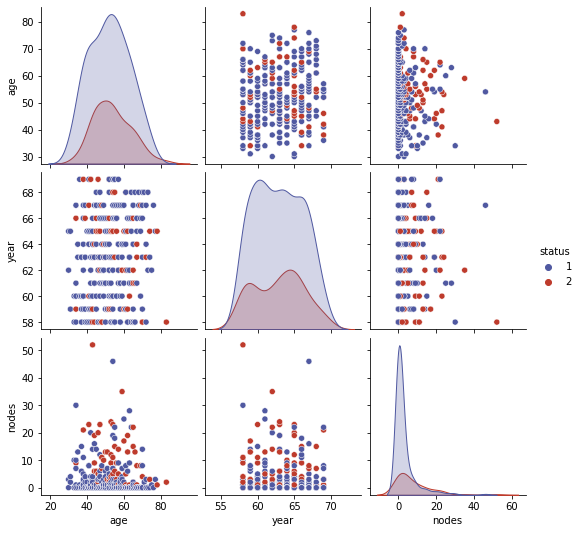

In [17]:
color_map = ['#5059A1','#BE3B2C']
sns.pairplot(data = data , hue='status',palette=color_map )

**From Graph 3 (nodes vs age ) , as the point are clustered at the near end of the graph. Hence a lot of people from all age group have very less number of nodes .**
<br>
**From the same Graph (nodes vs age ) , as the point which are at the far end of the graph are generally orange. Hence we can conclude that the Person which have higher number of nodes have less chances of surviving more than 5 years.**



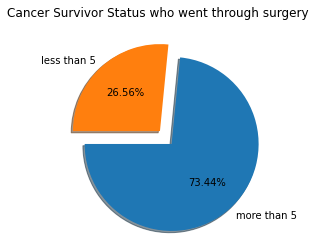

In [18]:
plt.pie(x=data.status.value_counts() , labels=['more than 5 ',"less than 5"] , 
        autopct="%.2f%%" , shadow=True ,explode=[0.2,0] , startangle =180
       )
plt.title("Cancer Survivor Status who went through surgery ")
plt.show()

**From this we can conclude that after undegoing surgery we have significantly more chances or survivng more than 5 year .**

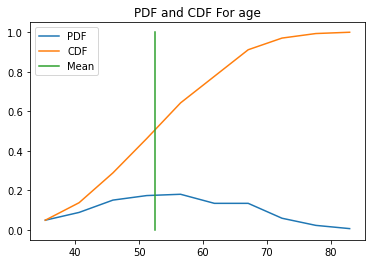

In [19]:
# probability density function and cumlative density function of the random variable
# age 

counts, bin_edges = np.histogram(data.age, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
y_range = np.arange(0,1,0.001)
mean_age = [data.age.mean()]* len(y_range)

plt.plot(bin_edges[1:],pdf );
plt.plot(bin_edges[1:], cdf);
plt.plot(mean_age,y_range)
plt.title("PDF and CDF For age")
plt.legend(['PDF' , "CDF" , "Mean"])
plt.show();


**Probability that a person will have breast cancer is very high among the age group of 52 - 56 as the mean of the data is there.**

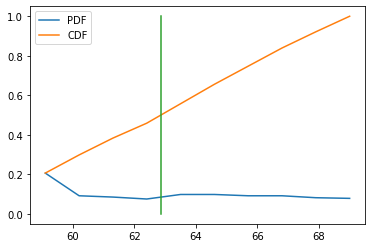

In [20]:
# pdf and cdf for the year attribute 


counts, bin_edges = np.histogram(data.year, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
y_range = np.arange(0,1,0.001)
mean_year = [data.year.mean()]* len(y_range)

plt.plot(bin_edges[1:],pdf );
plt.plot(bin_edges[1:], cdf)
plt.plot(mean_year,y_range)

plt.legend(['PDF' , "CDF"])
plt.show();


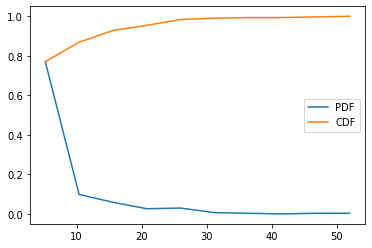

In [21]:
# pdf and cdf for the nodes attribute 


counts, bin_edges = np.histogram(data.nodes, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf );
plt.plot(bin_edges[1:], cdf)

plt.legend(['PDF' , "CDF"])
plt.show();


**It is very clear that the probability of less nodes are very high than than higher number of nodes. Approx 80 % of people have less than 10(3-7) numbers of nodes**

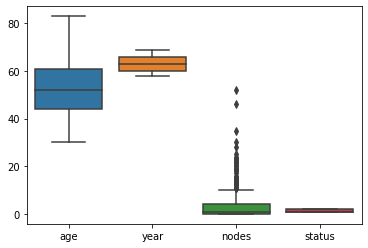

In [22]:
sns.boxplot(data=data )
plt.show()

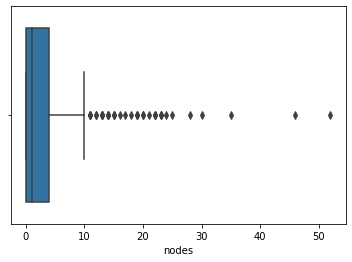

In [23]:
sns.boxplot(data = data , x="nodes" )
plt.show()

In [24]:
data[data.nodes>25]

,age,year,nodes,status
8,34,58,30,1
61,43,58,52,2
173,54,67,46,1
214,59,62,35,2
251,63,61,28,1


**It seems people with old age and having large number of nodes have less chances are survival and hence the entries at 252 , 174 might be human error and can be outliers.**

# Mean , Median and Quantiles 

In [25]:
print("The mean of the age columns is ", data.age.mean());
print("The mean of the year columns is ", data.year.mean());
print("The mean of the nodes columns is ", data.nodes.mean());

print()

print("The standard deviation of the age columns is ", data.age.std());
print("The standard deviation of the year columns is ", data.year.std());
print("The standard deviation of the nodes columns is ", data.nodes.std());


The mean of the age columns is  52.5311475409836
The mean of the year columns is  62.84918032786885
The mean of the nodes columns is  4.036065573770492

The standard deviation of the age columns is  10.744024363993276
The standard deviation of the year columns is  3.2540775509361284
The standard deviation of the nodes columns is  7.199370238971683


In [26]:

print("The median of the age columns is ", data.age.median());
print("The median of the year columns is ", data.year.median());
print("The median of the nodes columns is ", data.nodes.median());


print("\nQuantiles:")
print(np.percentile(data["age"],np.arange(0, 100, 25)))
print(np.percentile(data["year"],np.arange(0, 100, 25)))
print(np.percentile(data["nodes"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(data["age"],90))
print(np.percentile(data["year"],90))
print(np.percentile(data["nodes"], 90))


The median of the age columns is  52.0
The median of the year columns is  63.0
The median of the nodes columns is  1.0

Quantiles:
[30. 44. 52. 61.]
[58. 60. 63. 66.]
[0. 0. 1. 4.]

90th Percentiles:
67.0
67.0
13.0
